In [1]:
import os
import torch
import pymongo

from matplotlib import pyplot as plt

from deep_fields import data_path, models_path
from deep_fields.data.crypto.create_dataset_files import create_merged_dataframe

crypto_plots_dir = os.path.join(models_path,"crypto_plots")
if not os.path.isdir(crypto_plots_dir):
    os.makedirs(crypto_plots_dir)
    
%matplotlib inline

In [11]:
top = 10 

client = pymongo.MongoClient()
db = client["crypto"]
collection = db['birth_2021-06-14']

In [12]:
db.collection_names()

<ipython-input-12-8ff4d2505e25>:1: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['birth_birth_2021-06-14',
 'birth_2021-06-08',
 'birth_2021-06-21',
 'birth_2021-06-20',
 'birth_2021-06-02',
 'birth_2021-05-10',
 'birth_2021-06-14',
 'birth_2021-06-16',
 'birth_2021-06-17',
 'birth_2021-06-19',
 'birth_2021-06-18']

In [13]:
db['birth_2021-06-14'].find_one()

{'_id': ObjectId('60c70bb436e800e259e9e4e3'),
 'id': 'dash',
 'symbol': 'dash',
 'name': 'Dash',
 'last_price': 172.80977215238104,
 'last_volume': 644727244.0595541,
 'last_marketcap': 1759220878.8437428,
 'survival_time': 2356,
 'last_date': datetime.datetime(2021, 6, 14, 2, 0),
 'birth_date': datetime.datetime(2015, 1, 1, 0, 0)}

In [15]:
crypto_folder = os.path.join(data_path, "raw", "crypto")
data_folder = os.path.join(crypto_folder, "2021-06-14")
top_coins_name = []
for a in collection.find().sort([("last_marketcap", -1)]).limit(top):
    top_coins_name.append(a["id"])
    print(a["birth_date"])
    
data_merged, coins_data = create_merged_dataframe(data_folder,
                                                  collection,
                                                  break_point=20,
                                                  all_coins_ids=top_coins_name,
                                                  span="full")
#data_merged = data_merged.fillna(0.)
columns_ids = [coin_data["id"] for coin_data in coins_data]

price_df = data_merged[:-1]["price"]
price_df.columns = columns_ids

2015-01-01 00:00:00
2015-08-07 00:00:00
2015-02-25 00:00:00
2017-09-16 00:00:00
2017-10-18 00:00:00
2015-01-01 00:00:00
2015-01-01 00:00:00
2018-10-05 00:00:00
2020-08-19 00:00:00
2020-09-17 00:00:00
Current Coin 1 ethereum
Current Coin 2 tether
Current Coin 3 binancecoin
Current Coin 4 cardano
Current Coin 5 dogecoin
Current Coin 6 ripple
Current Coin 7 usd-coin
Current Coin 8 polkadot
Current Coin 9 uniswap


In [6]:
#data_merged.columns

In [7]:
price = torch.Tensor(data_merged["price"].values).T
market_cap = torch.Tensor(data_merged["market_cap"].values).T
volume =  torch.Tensor(data_merged["volume"].values).T


pmv_mask = (price == price)*(market_cap == market_cap)*(volume == volume)
returns = (price[:, 1:] - price[:, :-1]) / (price[:, :-1])
returns_mask = (returns == returns)

pmv = torch.cat([price.unsqueeze(-1),market_cap.unsqueeze(-1),volume.unsqueeze(-1)],dim=-1)

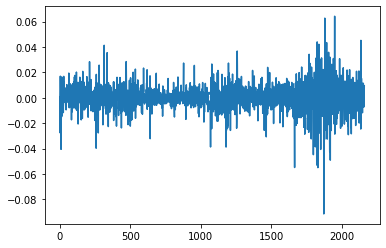

In [8]:
plt.plot(returns[0,:].detach().numpy())

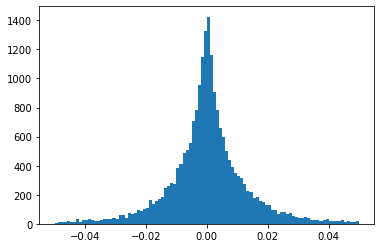

In [9]:
returns_ = returns[torch.where(returns == returns)].detach().numpy()
stuff = plt.hist(returns_,bins=100,range=[-0.05,0.05])